# RNN & LSTM

### RNN伪代码

In [ ]:
# t时刻
state_t = 0             # 初始状态
for input_t in input_sequence:     # 遍历每一个输入
    output_t = f(input_t, state_t)   
    state_t = output_t

### 更详细的RNN伪代码

In [ ]:
# t时刻
state_t = 0             # 初始状态
for input_t in input_sequence:     # 遍历每一个输入
    output_t = activation(dot(W,input_t) + dot(U, state_t) + b)   
    state_t = output_t

### 简单RNN的Numpy实现
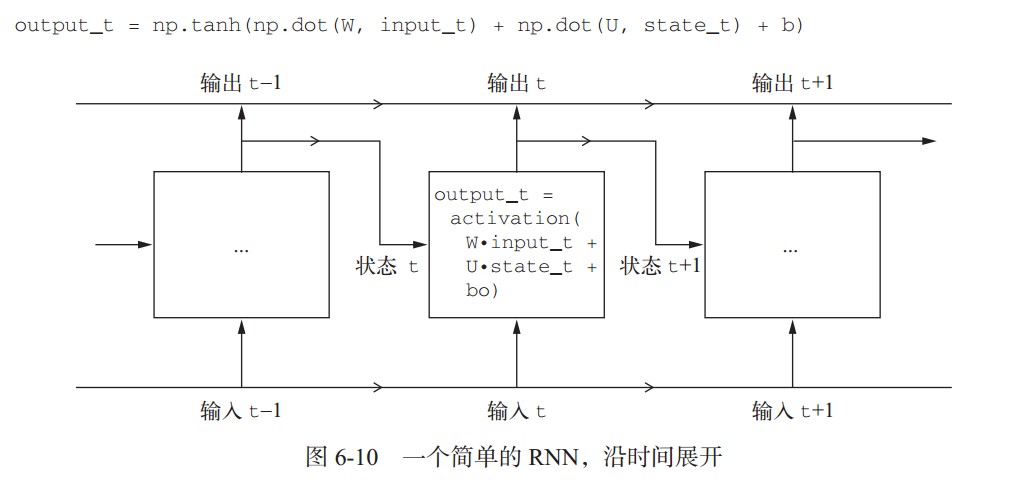

In [ ]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))   # “state”要“output”维度相同

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []  # 用于存储每次的输出
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)  # 最终输出是一个形状为 (timesteps, output_features) 的二维张量

In [32]:
##### 探索：np.stack(),当把一维变为二维时
import numpy as np
a=[[1,2,3],[4,5,6]]
print("列表a如下：")
print(a)
# print(a.shape())
print("增加一维，新维度的下标为0")
c=np.stack(a,axis=0)
print(c)
print(c.shape)

列表a如下：
[[1, 2, 3], [4, 5, 6]]
增加一维，新维度的下标为0
[[1 2 3]
 [4 5 6]]
(2, 3)


### keras中的循环层

In [33]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 加载模块
import pandas as pd
from keras.layers import LSTM
# from keras.layers import layers

In [104]:
# 加载数据
file = 'D:/homework/生猪价格预测/self/self-data/total_data.xlsx'
origin_data = pd.read_excel(file, index_col = 0)
origin_data.head()

,猪肉价格
日期,
2014-06-24,12.61
2014-07-01,12.62
2014-07-08,12.84
2014-07-15,13.23
2014-07-22,13.54


### 模型结构
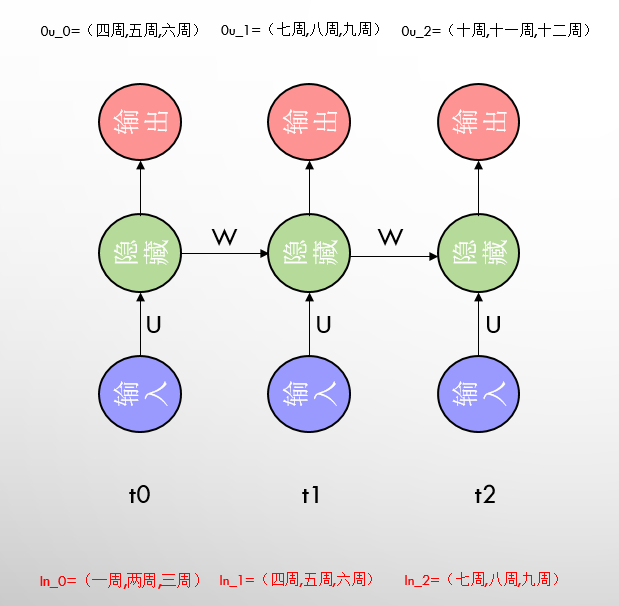

In [105]:
# 组成向量
data = origin_data[:234].values
data = data.reshape(26,3,3)  # 单个单元输入向量长度为3，一共有3个时间步，输入26次

# print(data)

# 数据分集
train_x =  data[0:25]           # 训练集用0~63个做输入，有模型可知，必须是9的倍数 
train_y =  data[1:26].copy()    # 用1~64做输出

# print(len(train_x))
# print(len(train_y))

# test_x = data[63:72]            # 省去验证集，测试集有
# test_y = data[64:73].copy()           

# print(len(test_x))
# print(len(test_y))

# 标准化
mean = train_x.mean(axis=0)
train_x -= mean
std = train_x.std(axis=0)
train_x /= std
print(train_x)
print(train_y)
print(len(train_x))
print(len(train_y))

[[[-0.94436215 -0.95695186 -0.9314731 ]
  [-0.80364131 -0.66494185 -0.53661733]
  [-0.44773462 -0.30197574 -0.16904967]]

 [[-0.06322976 -0.05459994 -0.09569821]
  [-0.11756644 -0.16562654 -0.149168  ]
  [-0.18899751 -0.27853042 -0.31727217]]

 [[-0.33172933 -0.40254072 -0.42446274]
  [-0.48699137 -0.54315763 -0.51643768]
  [-0.52336547 -0.54424406 -0.58331257]]

 [[-0.59644722 -0.52489352 -0.5868645 ]
  [-0.7183894  -0.75019081 -0.92003074]
  [-0.94928657 -0.97407495 -1.0583847 ]]

 [[-1.12210131 -1.19401041 -1.2087444 ]
  [-1.12841048 -1.06277031 -0.99671342]
  [-0.82588887 -0.73962174 -0.66312468]]

 [[-0.6002289  -0.4751877  -0.45615089]
  [-0.40173946 -0.26711339 -0.18549137]
  [-0.08152209  0.01844365  0.27561785]]

 [[ 0.47755107  0.6068699   0.79156993]
  [ 1.05160257  1.20647569  1.16654538]
  [ 1.18429948  1.15944929  1.14214942]]

 [[ 1.05236705  0.94716363  0.91040049]
  [ 0.88109875  0.88577724  0.78313197]
  [ 0.67876696  0.54596338  0.45424497]]

 [[ 0.44351591  0.427164

In [58]:
from keras.models import Sequential
from keras.layers import SimpleRNN
# 组建一个LSTM模型
# def build_model():
model = models.Sequential()
    # 第一个3代表：3个节点接收输入向量。 batch:5 time_step:3 one_vector = 3
model.add(SimpleRNN(3, batch_input_shape=(5, 3, 3), stateful=True, return_sequences=True))
#     model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse')
#     return model 
    
# 在该模型上进行训练
# epose = 1000
# for i in range(epose):
#     # we train the network to predict the 11th timestep given the first 10:
#     model = build_model()
#     model.train_on_batch(train_x, train_y)
    
    # the state of the network has changed. We can feed the follow-up sequences:
#     model.train_on_batch(X[:, 10:20, :], np.reshape(X[:, 20, :], (32, 16)))

history = model.fit(train_x, train_y,epochs=1000,batch_size=5)

Epoch 1/1000
25/25 [==============================] - 0s 11ms/step - loss: 0.6607
Epoch 2/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5976
Epoch 3/1000
25/25 [==============================] - 0s 400us/step - loss: 0.6592
Epoch 4/1000
25/25 [==============================] - 0s 360us/step - loss: 0.6576
Epoch 5/1000
25/25 [==============================] - 0s 360us/step - loss: 0.6380
Epoch 6/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5925
Epoch 7/1000
25/25 [==============================] - 0s 360us/step - loss: 0.6402
Epoch 8/1000
25/25 [==============================] - 0s 440us/step - loss: 0.6458
Epoch 9/1000
25/25 [==============================] - 0s 400us/step - loss: 0.6442
Epoch 10/1000
25/25 [==============================] - 0s 360us/step - loss: 0.6000
Epoch 11/1000
25/25 [==============================] - 0s 360us/step - loss: 0.6468
Epoch 12/1000
25/25 [==============================] - 0s 400us/step - loss: 0.6465
Ep

25/25 [==============================] - 0s 400us/step - loss: 0.5274
Epoch 99/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5350
Epoch 100/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5394
Epoch 101/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5375
Epoch 102/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5366
Epoch 103/1000
25/25 [==============================] - 0s 480us/step - loss: 0.5251
Epoch 104/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5301
Epoch 105/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5349
Epoch 106/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5375
Epoch 107/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5301
Epoch 108/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5379
Epoch 109/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5

25/25 [==============================] - 0s 360us/step - loss: 0.5281
Epoch 194/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5264
Epoch 195/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5336
Epoch 196/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5309
Epoch 197/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5309
Epoch 198/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5301
Epoch 199/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5269
Epoch 200/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5251
Epoch 201/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5287
Epoch 202/1000
25/25 [==============================] - ETA: 0s - loss: 1.047 - 0s 280us/step - loss: 0.5291
Epoch 203/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5256
Epoch 204/1000
25/25 [==============================] - 

Epoch 289/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5265
Epoch 290/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5251
Epoch 291/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5251
Epoch 292/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5289
Epoch 293/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5248
Epoch 294/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5295
Epoch 295/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5309
Epoch 296/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5244
Epoch 297/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5264
Epoch 298/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5279
Epoch 299/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5225
Epoch 300/1000
25/25 [==============================] - 0s 360us/

25/25 [==============================] - 0s 320us/step - loss: 0.5214
Epoch 385/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5270
Epoch 386/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5231
Epoch 387/1000
25/25 [==============================] - 0s 240us/step - loss: 0.5243
Epoch 388/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5262
Epoch 389/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5226
Epoch 390/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5289
Epoch 391/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5214
Epoch 392/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5226
Epoch 393/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5276
Epoch 394/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5275
Epoch 395/1000
25/25 [==============================] - ETA: 0s - loss: 0.568 - 

25/25 [==============================] - 0s 320us/step - loss: 0.5288
Epoch 481/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5320
Epoch 482/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5226
Epoch 483/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5300
Epoch 484/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5198
Epoch 485/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5233
Epoch 486/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5230
Epoch 487/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5197
Epoch 488/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5254
Epoch 489/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5210
Epoch 490/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5248
Epoch 491/1000
25/25 [==============================] - 0s 360us/step - loss: 0.

Epoch 576/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5201
Epoch 577/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5195
Epoch 578/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5199
Epoch 579/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5220
Epoch 580/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5194
Epoch 581/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5233
Epoch 582/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5217
Epoch 583/1000
25/25 [==============================] - ETA: 0s - loss: 0.582 - 0s 360us/step - loss: 0.5189
Epoch 584/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5218
Epoch 585/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5365
Epoch 586/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5181
Epoch 587/1000
25/25 [===================

25/25 [==============================] - 0s 320us/step - loss: 0.5213
Epoch 672/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5189
Epoch 673/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5215
Epoch 674/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5255
Epoch 675/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5195
Epoch 676/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5254
Epoch 677/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5179
Epoch 678/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5249
Epoch 679/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5217
Epoch 680/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5214
Epoch 681/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5231
Epoch 682/1000
25/25 [==============================] - 0s 400us/step - loss: 0.

25/25 [==============================] - 0s 360us/step - loss: 0.5190
Epoch 768/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5208
Epoch 769/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5183
Epoch 770/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5126
Epoch 771/1000
25/25 [==============================] - 0s 480us/step - loss: 0.5184
Epoch 772/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5184
Epoch 773/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5214
Epoch 774/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5217
Epoch 775/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5178
Epoch 776/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5197
Epoch 777/1000
25/25 [==============================] - 0s 480us/step - loss: 0.5231
Epoch 778/1000
25/25 [==============================] - 0s 440us/step - loss: 0.

25/25 [==============================] - 0s 280us/step - loss: 0.5204
Epoch 864/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5205
Epoch 865/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5197
Epoch 866/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5245
Epoch 867/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5212
Epoch 868/1000
25/25 [==============================] - 0s 480us/step - loss: 0.5343
Epoch 869/1000
25/25 [==============================] - 0s 320us/step - loss: 0.5219
Epoch 870/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5167
Epoch 871/1000
25/25 [==============================] - ETA: 0s - loss: 0.060 - 0s 280us/step - loss: 0.5358
Epoch 872/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5219
Epoch 873/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5175
Epoch 874/1000
25/25 [==============================] - 

25/25 [==============================] - 0s 400us/step - loss: 0.5274
Epoch 959/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5176
Epoch 960/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5182
Epoch 961/1000
25/25 [==============================] - 0s 360us/step - loss: 0.5209
Epoch 962/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5357
Epoch 963/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5171
Epoch 964/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5206
Epoch 965/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5368
Epoch 966/1000
25/25 [==============================] - 0s 440us/step - loss: 0.5174
Epoch 967/1000
25/25 [==============================] - 0s 400us/step - loss: 0.5188
Epoch 968/1000
25/25 [==============================] - 0s 280us/step - loss: 0.5251
Epoch 969/1000
25/25 [==============================] - 0s 360us/step - loss: 0.

In [107]:
x = train_y[-5:]
print(x)

x -= mean
x = x/std
# print(x)
pre = model.predict(x, batch_size=None, verbose=1, steps=None)
print(pre)

[[[-4.4672 -5.0128 -4.8916]
  [-5.1796 -5.198  -5.1696]
  [-5.1948 -5.3928 -5.4948]]

 [[-5.4572 -4.8528 -4.6816]
  [-4.5496 -4.408  -4.3196]
  [-4.1648 -3.5828 -3.3948]]

 [[-2.9072 -2.6228 -1.9416]
  [-1.4896 -1.488  -1.3896]
  [-1.2848 -0.7628 -0.8548]]

 [[-0.7072 -0.8228 -0.8616]
  [-0.8696 -0.898  -1.1296]
  [-1.0648 -1.8328 -2.3348]]

 [[-2.4172 -2.0228 -2.0816]
  [-2.2496 -2.478  -2.8696]
  [-3.1848 -3.8728 -4.7148]]]
5/5 [==============================] - 0s 400us/step
[[[-1.         -0.99999982 -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-0.99999994 -0.99999988 -1.        ]]

 [[-0.99999982 -0.99999976 -0.99999988]
  [-0.99999976 -0.99999964 -0.99999976]
  [-0.99999928 -0.99999905 -0.99999952]]

 [[-0.99999928 -0.99999875 -0.99999952]
  [-0.9999997  -0.9999994  -0.99999976]
  [-0.9999997  -0.99999928 -0.9999997 ]]

 [[-0.99999976 -0.99999964 -0

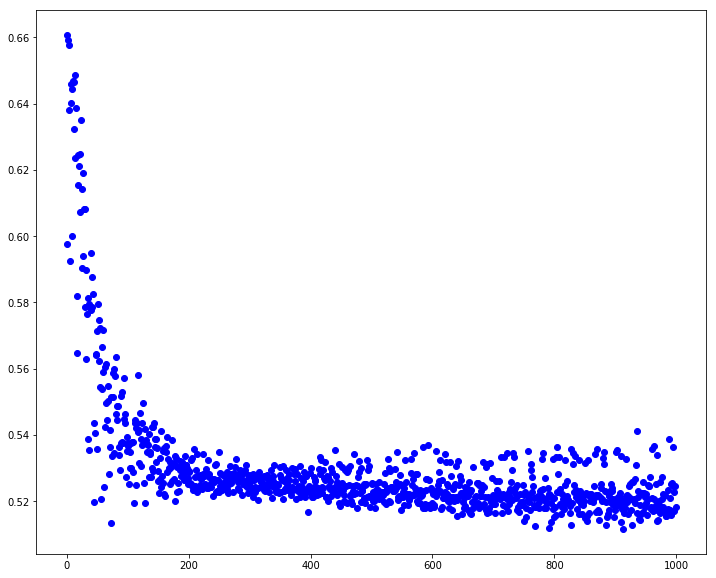

In [61]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1000)

plt.figure(figsize=[12,10])
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.show()
